### <font color="darkgreen">Explore Exercises</font>
Do your work for this exercise in a file named `explore.`

In [1]:
import re
import unicodedata
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from env import user, password, host

def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

### <font color ="blue">1. Spam Data</font>

#### a. Load the spam data set.

In [2]:
df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [3]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [4]:
labels = pd.concat([df.label.value_counts(),
                    df.label.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels

,n,percent
ham,4825,0.865937
spam,747,0.134063


In [5]:
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

In [6]:
ham_freq = pd.Series(ham_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

spam_freq.head()

call    359
free    216
txt     150
ur      144
text    137
dtype: int64

In [7]:

word_counts = (pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
                .set_axis(['all', 'ham', 'spam'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()

,all,ham,spam
0,3,0,3
008704050406,2,0,2
0089my,1,0,1
0121,1,0,1
01223585236,1,0,1


In [8]:
word_counts.sort_values(by='all', ascending=False)


,all,ham,spam
call,600,241,359
im,462,449,13
get,397,314,83
ur,384,240,144
go,304,273,31
...,...,...,...
lunchtime,1,1,0
bailiff,1,0,1
lul,1,1,0
luks,1,1,0


In [9]:
top_20_ham_bigrams = (pd.Series(nltk.ngrams(ham_words, 2))
                      .value_counts()
                      .head(20))

top_20_ham_bigrams.head()

(call, later)    52
(ill, call)      48
(let, know)      42
(sorry, ill)     39
(dont, know)     32
dtype: int64

In [10]:
top_20_spam_bigrams = (pd.Series(nltk.ngrams(spam_words, 2))
                      .value_counts()
                      .head(20))

top_20_spam_bigrams.head()

(please, call)         44
(customer, service)    27
(po, box)              24
(a1000, cash)          23
(guaranteed, call)     23
dtype: int64

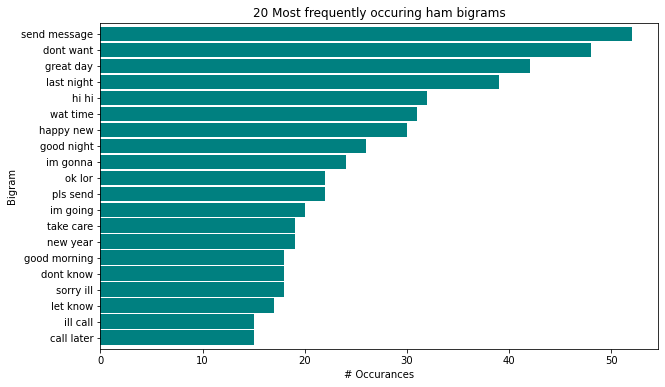

In [11]:
#ham bigrams
top_20_ham_bigrams.sort_values().plot.barh(color='teal', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring ham bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

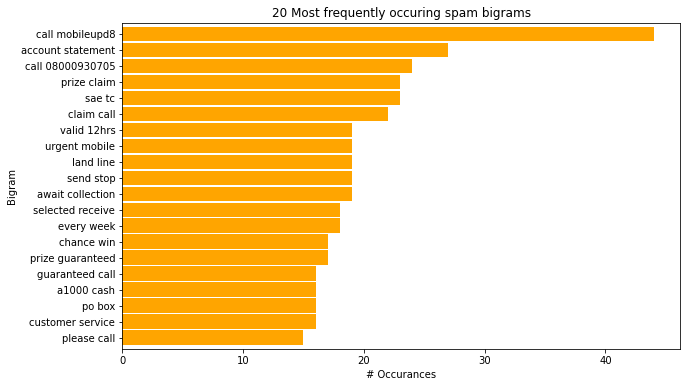

In [12]:
#spam bigrams 
top_20_spam_bigrams.sort_values().plot.barh(color='orange', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring spam bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_spam_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

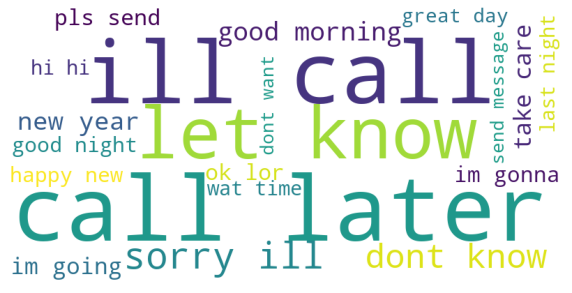

In [13]:
# ham wordcloud
# We can supply our own values to be used to determine how big the words (or
# phrases) should be through the `generate_from_frequencies` method. The
# supplied values must be in the form of a dictionary where the keys are the
# words (phrases), and the values are numbers that correspond to the sizes.
#
# We'll convert our series to a dictionary, and convert the tuples that make up
# the index into a single string that holds each phrase.

from wordcloud import WordCloud
data = {k[0] + ' ' + k[1]: v for k, v in top_20_ham_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

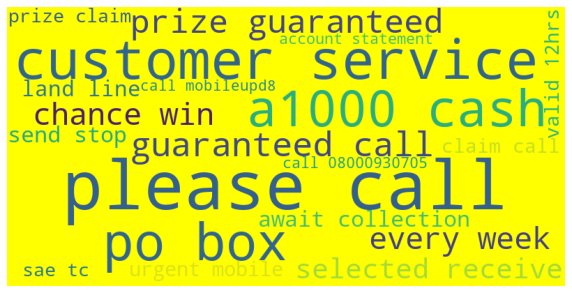

In [14]:
#spam wordcloud
data = {k[0] + ' ' + k[1]: v for k, v in top_20_spam_bigrams.to_dict().items()}
img = WordCloud(background_color='yellow', width=800, height=400).generate_from_frequencies(data) 
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

#### c. Is there any overlap in the bigrams for the spam data and the ham data?

In [15]:
top_20_ham_bigrams

(call, later)      52
(ill, call)        48
(let, know)        42
(sorry, ill)       39
(dont, know)       32
(good, morning)    31
(new, year)        30
(take, care)       26
(im, going)        24
(pls, send)        22
(ok, lor)          22
(im, gonna)        20
(good, night)      19
(happy, new)       19
(wat, time)        18
(hi, hi)           18
(last, night)      18
(great, day)       17
(dont, want)       15
(send, message)    15
dtype: int64

In [16]:
top_20_spam_bigrams

(please, call)          44
(customer, service)     27
(po, box)               24
(a1000, cash)           23
(guaranteed, call)      23
(prize, guaranteed)     22
(chance, win)           19
(every, week)           19
(selected, receive)     19
(await, collection)     19
(send, stop)            19
(land, line)            18
(urgent, mobile)        18
(valid, 12hrs)          17
(claim, call)           17
(sae, tc)               16
(prize, claim)          16
(call, 08000930705)     16
(account, statement)    16
(call, mobileupd8)      15
dtype: int64

#### d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [17]:
#ham trigram
top_20_ham_trigrams = (pd.Series(nltk.ngrams(ham_words, 3))
                      .value_counts()
                      .head(20))

top_20_ham_trigrams.head()

(ill, call, later)      42
(sorry, ill, call)      38
(happy, new, year)      19
(pls, send, message)    13
(pick, phone, right)    12
dtype: int64

In [18]:
#spam trigram
top_20_spam_trigrams = (pd.Series(nltk.ngrams(spam_words, 3))
                      .value_counts()
                      .head(20))

top_20_spam_trigrams.head()

(prize, guaranteed, call)     21
(call, customer, service)     15
(land, line, claim)           14
(reply, call, 08000930705)    14
(private, 2003, account)      13
dtype: int64

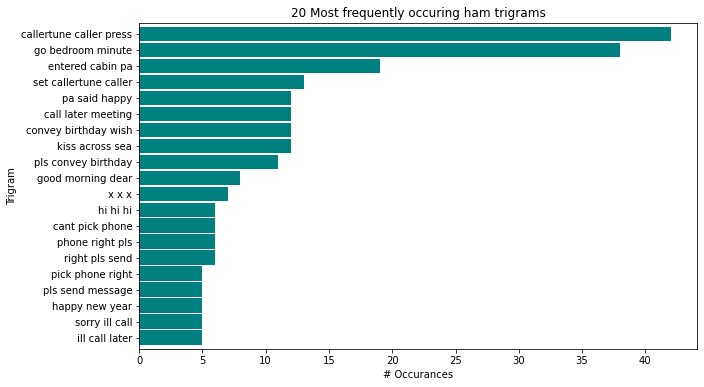

In [19]:
top_20_ham_trigrams.sort_values().plot.barh(color='teal', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring ham trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ham_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2])
_ = plt.yticks(ticks, labels)

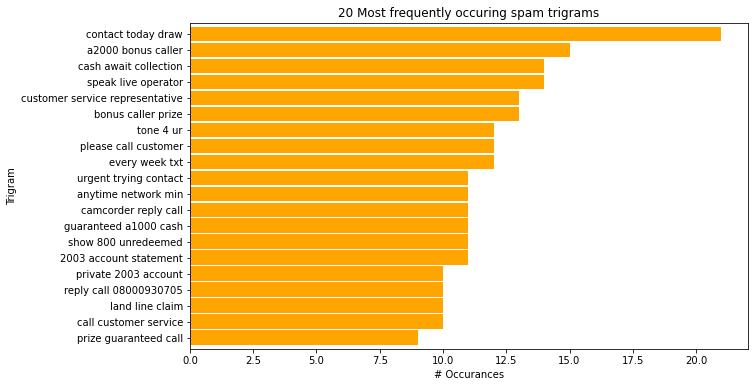

In [20]:
top_20_spam_trigrams.sort_values().plot.barh(color='orange', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring spam trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_spam_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2])
_ = plt.yticks(ticks, labels)

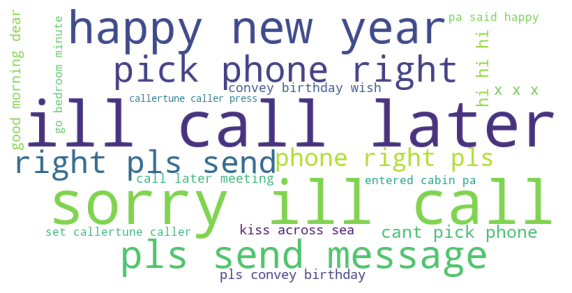

In [21]:
#ham trigram wordcloud

data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_ham_trigrams.to_dict().items()}
img = WordCloud(background_color='white',  width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()


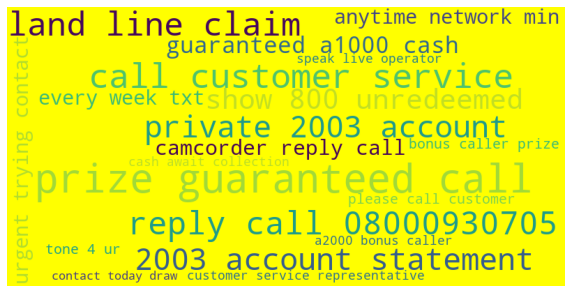

In [22]:
#spam trigram
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_spam_trigrams.to_dict().items()}
img = WordCloud(background_color='yellow', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

### <font color = "blue"> 2.  Explore the blog articles using the techniques discussed in the exploration lesson.</font>

In [70]:
from acquire import acquire_codeup_blog, acquire_news_articles
from prepare import basic_clean, stem, lemmatize, remove_stopwords
import warnings
warnings.filterwarnings('ignore')

In [71]:
codeup_df = acquire_codeup_blog()
codeup_df.head()

,title,published_date,blog_image,content
0,Codeup’s Data Science Career Accelerator is Here!,"September 30, 2018",https://codeup.com/wp-content/uploads/2018/10/...,The rumors are true! The time has arrived. Cod...
1,Data Science Myths,"October 31, 2018",https://codeup.com/wp-content/uploads/2018/10/...,By Dimitri Antoniou and Maggie Giust\nData Sci...
2,Data Science VS Data Analytics: What’s The Dif...,"October 17, 2018",https://codeup.com/wp-content/uploads/2018/10/...,"By Dimitri Antoniou\nA week ago, Codeup launch..."
3,10 Tips to Crush It at the SA Tech Job Fair,"August 14, 2018",None,SA Tech Job Fair\nThe third bi-annual San Anto...
4,Competitor Bootcamps Are Closing. Is the Model...,"August 14, 2018",None,Competitor Bootcamps Are Closing. Is the Model...


In [72]:
codeup_df = codeup_df.rename({'content':'original'},axis=1)
codeup_df['clean'] = codeup_df.original.apply(lambda x: basic_clean(x))
codeup_df['stemmed'] = codeup_df.clean.apply(lambda x: stem(x))
codeup_df['lemmatized'] = codeup_df.clean.apply(lambda x: lemmatize(x))
codeup_df['stopwords_removed'] = codeup_df.lemmatized.apply(lambda x: remove_stopwords(x))
codeup_df.head()

,title,published_date,blog_image,original,clean,stemmed,lemmatized,stopwords_removed
0,Codeup’s Data Science Career Accelerator is Here!,"September 30, 2018",https://codeup.com/wp-content/uploads/2018/10/...,The rumors are true! The time has arrived. Cod...,the rumors are true the time has arrived codeu...,the rumor are true the time ha arriv codeup ha...,the rumor are true the time ha arrived codeup ...,rumor true time ha arrived codeup ha officiall...
1,Data Science Myths,"October 31, 2018",https://codeup.com/wp-content/uploads/2018/10/...,By Dimitri Antoniou and Maggie Giust\nData Sci...,by dimitri antoniou and maggie giust\ndata sci...,by dimitri antoni and maggi giust data scienc ...,by dimitri antoniou and maggie giust data scie...,dimitri antoniou maggie giust data science big...
2,Data Science VS Data Analytics: What’s The Dif...,"October 17, 2018",https://codeup.com/wp-content/uploads/2018/10/...,"By Dimitri Antoniou\nA week ago, Codeup launch...",by dimitri antoniou\na week ago codeup launche...,by dimitri antoni a week ago codeup launch our...,by dimitri antoniou a week ago codeup launched...,dimitri antoniou week ago codeup launched imme...
3,10 Tips to Crush It at the SA Tech Job Fair,"August 14, 2018",None,SA Tech Job Fair\nThe third bi-annual San Anto...,sa tech job fair\nthe third biannual san anton...,sa tech job fair the third biannual san antoni...,sa tech job fair the third biannual san antoni...,sa tech job fair third biannual san antonio te...
4,Competitor Bootcamps Are Closing. Is the Model...,"August 14, 2018",None,Competitor Bootcamps Are Closing. Is the Model...,competitor bootcamps are closing is the model ...,competitor bootcamp are close is the model in ...,competitor bootcamps are closing is the model ...,competitor bootcamps closing model danger prog...


In [73]:
words_in_blogs = ' '.join(codeup_df.stopwords_removed)
words_in_blogs

'rumor true time ha arrived codeup ha officially opened application new data science career accelerator 25 seat available immersive program one kind san antonio help land job glassdoors 1 best job america data science method providing actionable intelligence data data revolution ha hit san antonio resulting explosion data scientist position across company like usaa accenture booz allen hamilton heb weve even seen utsa invest 70 cybersecurity center school data science built program specifically meet growing demand industry program 18 week long fulltime handson projectbased curriculum development instruction led senior data scientist maggie giust ha worked heb capital group rackspace along input dozen practitioner hiring partner student work real data set realistic problem entire data science pipeline collection deployment receive professional development training resume writing interviewing continuing education prepare smooth transition workforce focus applied data science immediate im

In [74]:
words_in_blogs = pd.Series(words_in_blogs.split())

In [75]:
words_in_blogs.value_counts().head(20)

data         75
science      26
company      20
learning     20
job          14
machine      14
scientist    13
model        12
like         12
education    10
one          10
new           9
fair          9
work          9
business      8
statistic     8
time          8
make          8
myth          7
question      7
dtype: int64

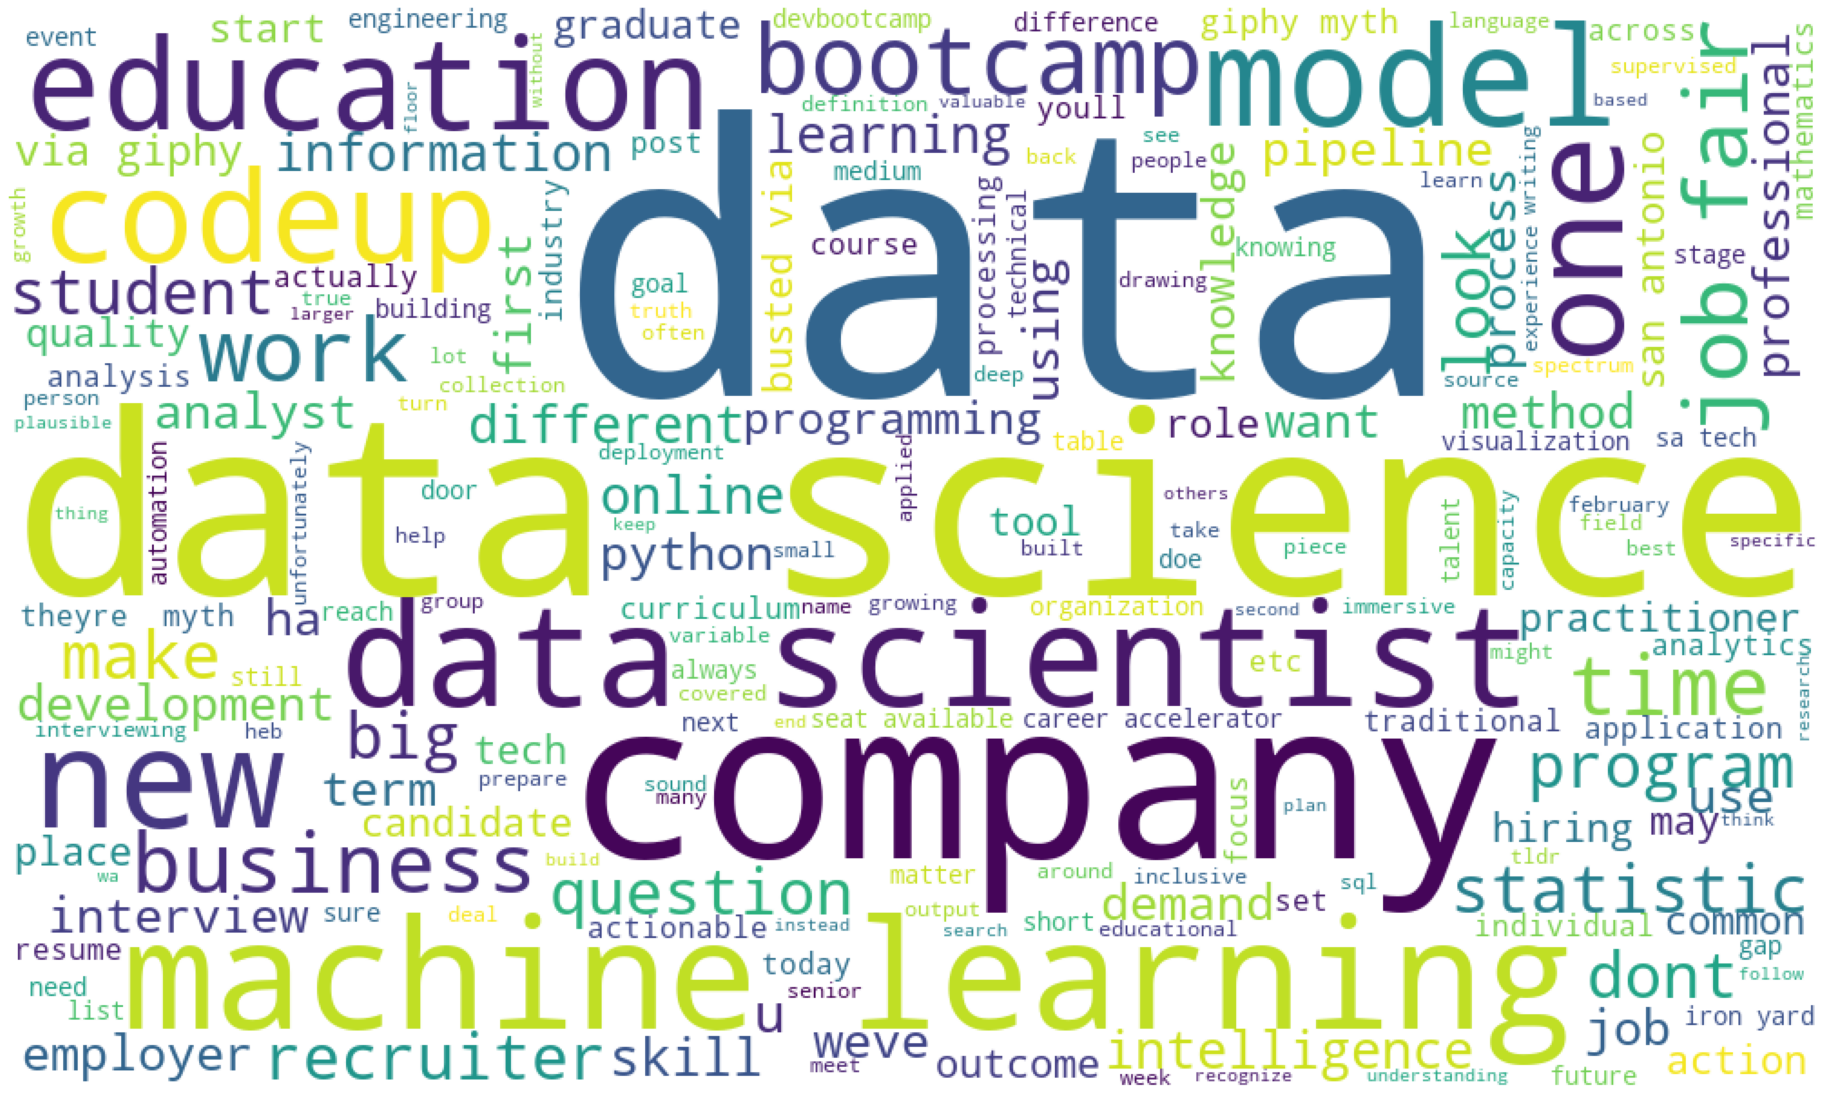

In [76]:
blog_cloud =WordCloud(background_color='white', height=600, width=1000).generate(' '.join(words_in_blogs))
plt.figure(figsize=(100,20))
plt.axis('off')
plt.imshow(blog_cloud)

In [77]:
top_20_codeup_bigrams = (pd.Series(nltk.ngrams(words_in_blogs, 2))
                      .value_counts()
                      .head(20))

top_20_codeup_bigrams.head()

(data, science)        26
(machine, learning)    14
(data, scientist)      13
(job, fair)             9
(via, giphy)            5
dtype: int64

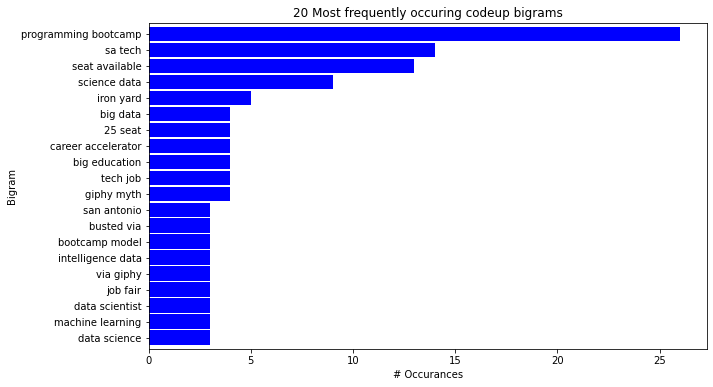

In [78]:
top_20_codeup_bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring codeup bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_codeup_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

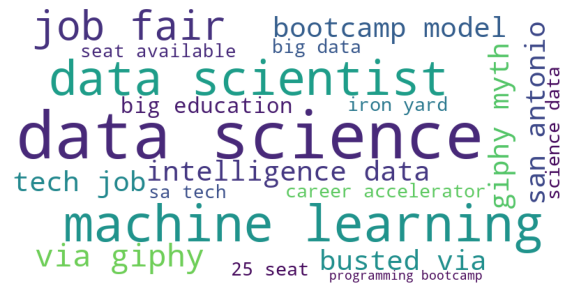

In [79]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_codeup_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

In [80]:
top_20_codeup_trigrams = (pd.Series(nltk.ngrams(words_in_blogs, 3))
                      .value_counts()
                      .head(20))

top_20_codeup_trigrams.head()


(tech, job, fair)        4
(via, giphy, myth)       4
(busted, via, giphy)     4
(25, seat, available)    3
(data, science, data)    3
dtype: int64

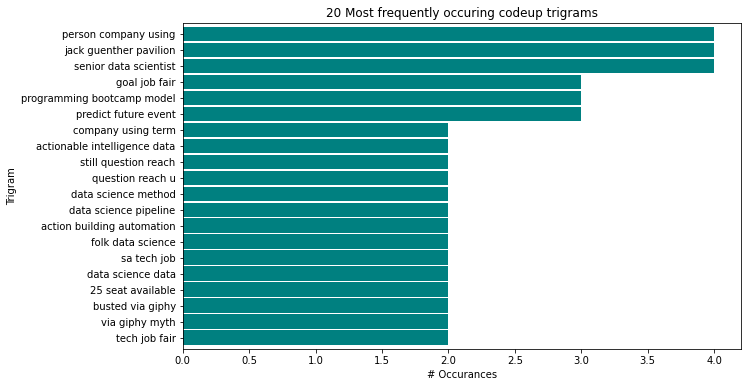

In [81]:
top_20_codeup_trigrams.sort_values().plot.barh(color='teal', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring codeup trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_codeup_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2])
_ = plt.yticks(ticks, labels)

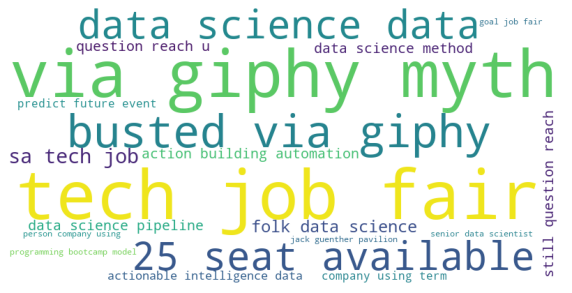

In [82]:
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_codeup_trigrams.to_dict().items()}
img = WordCloud(background_color='white',  width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

### <font color ="blue"> 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.</font>
 

In [83]:
import re
import unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords


In [87]:
def tokenize(string):
    '''
    This function takes in a string and
    returns a tokenized string.
    '''
    # Create tokenizer.
    tokenizer = nltk.tokenize.ToktokTokenizer()
    
    # Use tokenizer
    string = tokenizer.tokenize(string, return_str=True)
    
    return string

def prep_article_data(df, column, extra_words=[], exclude_words=[]):
    '''
    This function take in a df and the string name for a text column with 
    option to pass lists for extra_words and exclude_words and
    returns a df with the text article title, original text, stemmed text,
    lemmatized text, cleaned, tokenized, & lemmatized text with stopwords removed.
    '''
    df['clean'] = df[column].apply(basic_clean)\
                            .apply(tokenize)\
                            .apply(remove_stopwords, 
                                   extra_words=extra_words, 
                                   exclude_words=exclude_words)
    
    df['stemmed'] = df[column].apply(basic_clean)\
                            .apply(tokenize)\
                            .apply(stem)\
                            .apply(remove_stopwords, 
                                   extra_words=extra_words, 
                                   exclude_words=exclude_words)
    
    df['lemmatized'] = df[column].apply(basic_clean)\
                            .apply(tokenize)\
                            .apply(lemmatize)\
                            .apply(remove_stopwords, 
                                   extra_words=extra_words, 
                                   exclude_words=exclude_words)
    
    return df[['title', column,'clean', 'stemmed', 'lemmatized','category']]

In [88]:
news_df = acquire_news_articles()
news_df.head()

,title,content,category
0,"Godrej, PwC, Deloitte India give extra offs to...",Several companies in India have been offering ...,business
1,"Google adopts hybrid workweek, 20% staff to wo...",Google CEO Sundar Pichai informed employees th...,business
2,"Bill Gates' company Cascade transfers ₹13,300 ...","Bill Gates' Cascade Investment, a holding comp...",business
3,Second COVID-19 wave hit India like a tsunami:...,Biocon Founder Kiran Mazumdar-Shaw said that t...,business
4,Help nations prevent health crisis from becomi...,Finance Minister Nirmala Sitharaman on Wednesd...,business


In [89]:
news_df = prep_article_data(news_df,'content')
news_df.head()

,title,content,clean,stemmed,lemmatized,category
0,"Godrej, PwC, Deloitte India give extra offs to...",Several companies in India have been offering ...,several companies india offering extra holiday...,sever compani india offer extra holiday employ...,several company india offering extra holiday e...,business
1,"Google adopts hybrid workweek, 20% staff to wo...",Google CEO Sundar Pichai informed employees th...,google ceo sundar pichai informed employees co...,googl ceo sundar pichai inform employe compani...,google ceo sundar pichai informed employee com...,business
2,"Bill Gates' company Cascade transfers ₹13,300 ...","Bill Gates' Cascade Investment, a holding comp...",bill gates cascade investment holding company ...,bill gate cascad invest hold compani gate crea...,bill gate cascade investment holding company g...,business
3,Second COVID-19 wave hit India like a tsunami:...,Biocon Founder Kiran Mazumdar-Shaw said that t...,biocon founder kiran mazumdarshaw said second ...,biocon founder kiran mazumdarshaw said second ...,biocon founder kiran mazumdarshaw said second ...,business
4,Help nations prevent health crisis from becomi...,Finance Minister Nirmala Sitharaman on Wednesd...,finance minister nirmala sitharaman wednesday ...,financ minist nirmala sitharaman wednesday sai...,finance minister nirmala sitharaman wednesday ...,business


In [91]:
sports_words = ' '.join(news_df[news_df.category == 'sports'].lemmatized).replace("'",'')
technology_words = ' '.join(news_df[news_df.category == 'technology'].lemmatized).replace("'",'')
entertainment_words = ' '.join(news_df[news_df.category == 'entertainment'].lemmatized).replace("'",'')
world_words = ' '.join(news_df[news_df.category == 'world'].lemmatized).replace("'",'')
business_words = ' '.join(news_df[news_df.category == 'business'].lemmatized).replace("'",'')
science_words = ' '.join(news_df[news_df.category == 'science'].lemmatized).replace("'",'')

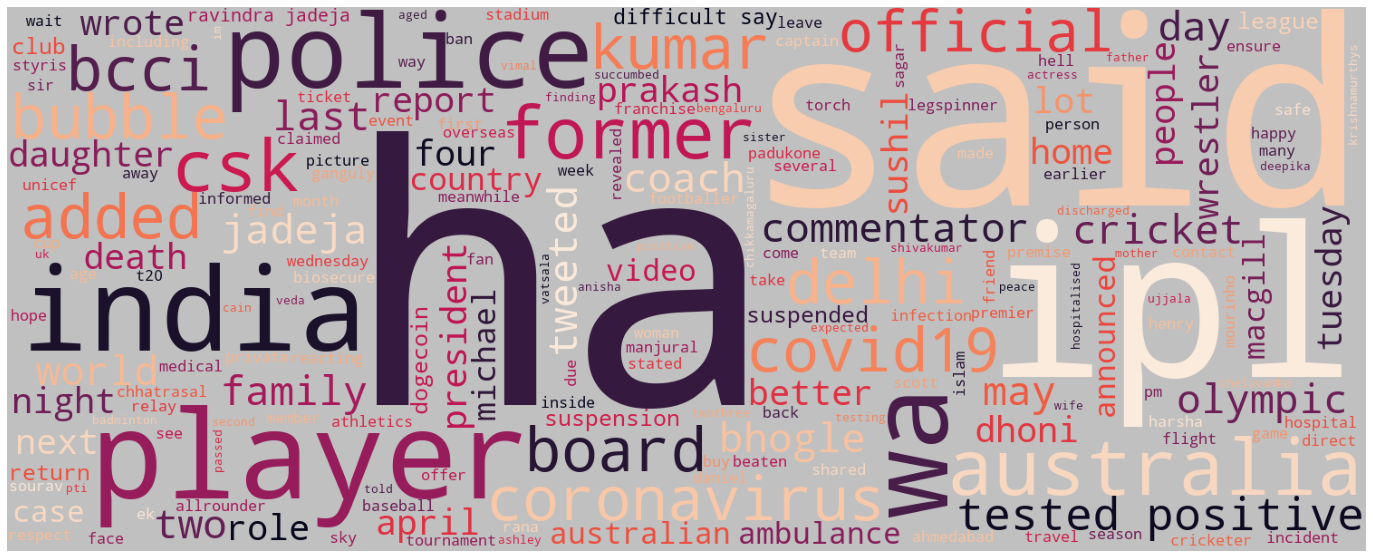

In [93]:
sports_cloud = WordCloud(background_color='silver', colormap='rocket', height=600, width=1500).generate(sports_words)
plt.figure(figsize=(200,10))
plt.axis('off')
plt.imshow(sports_cloud)

In [94]:
top_20_sports_bigrams = (pd.Series(nltk.ngrams(sports_words.split(), 2))
                      .value_counts()
                      .head(20))

top_20_sports_bigrams.head()

(ipl, 2021)                5
(tested, positive)         5
(ha, said)                 4
(difficult, say)           3
(positive, coronavirus)    3
dtype: int64

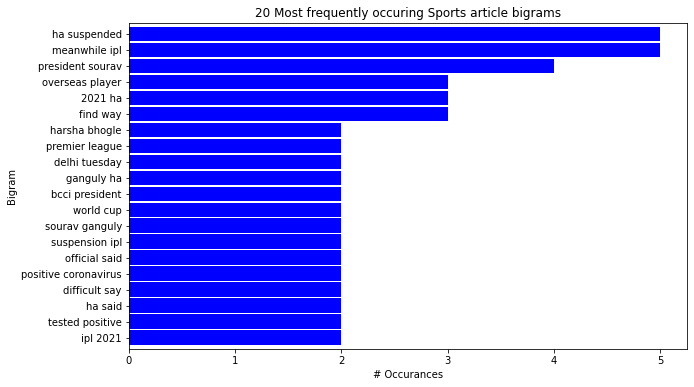

In [95]:
top_20_sports_bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring Sports article bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_sports_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

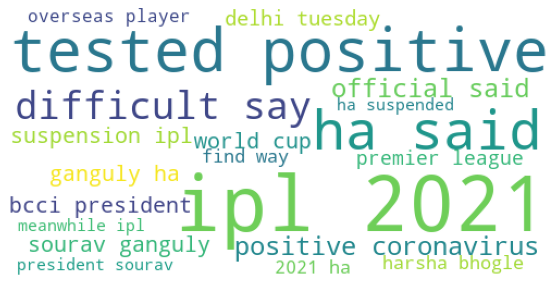

In [96]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_sports_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=500, height=250).generate_from_frequencies(data)
plt.figure(figsize=(50, 5))
plt.imshow(img)
plt.axis('off')
plt.show()